### Gaussian Mixture
> Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution.

sklearn.mixture.GaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

### Variational Bayesian estimation of a Gaussian mixture

> This class allows to infer an approximate posterior distribution over the parameters of a Gaussian mixture distribution. The effective number of components can be inferred from the data.

> This class implements two types of prior for the weights distribution: a finite mixture model with Dirichlet distribution and an infinite mixture model with the Dirichlet Process. In practice Dirichlet Process inference algorithm is approximated and uses a truncated distribution with a fixed maximum number of components (called the Stick-breaking representation). The number of components actually used almost always depends on the data.

sklearn.mixture.BayesianGaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weight_concentration_prior_type=’dirichlet_process’, weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1500, random_state=170)
X[:10]

array([[ -5.19811282,   0.64186932],
       [ -5.75229538,   0.41862711],
       [-10.84489837,  -7.55352273],
       [ -4.57098483,  -0.80101741],
       [ -3.51916215,   0.0393449 ],
       [  1.60391611,   0.76388041],
       [ -9.75157357,  -5.2030262 ],
       [-11.51023635,  -4.16284321],
       [ -7.72675795,  -5.86656563],
       [  2.67656739,   3.29872756]])

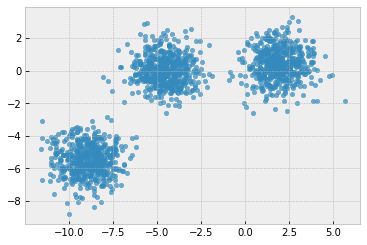

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=20, alpha=0.7)

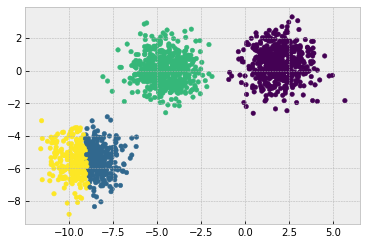

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20)

Text(0, 0.5, 'KMeans Inertia')

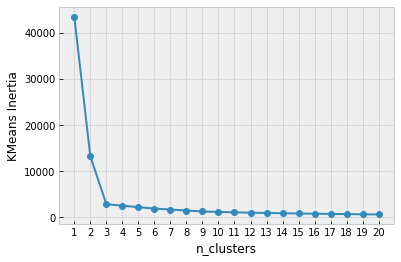

In [5]:
L = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k).fit(X)
    # inertia_ : float
    # Sum of squared distances of samples to their closest cluster center.
    L.append(kmeans.inertia_)
    
L_y = [k for k in range(1, 21)]
ax = plt.gca()
ax.set_xticks(L_y)
plt.plot(L_y, L, 'o-')
plt.xlabel('n_clusters')
plt.ylabel('KMeans Inertia')

For n_clusters = 2, The average silhouette_score = 0.628
For n_clusters = 3, The average silhouette_score = 0.733
For n_clusters = 4, The average silhouette_score = 0.587
For n_clusters = 5, The average silhouette_score = 0.444
For n_clusters = 6, The average silhouette_score = 0.309


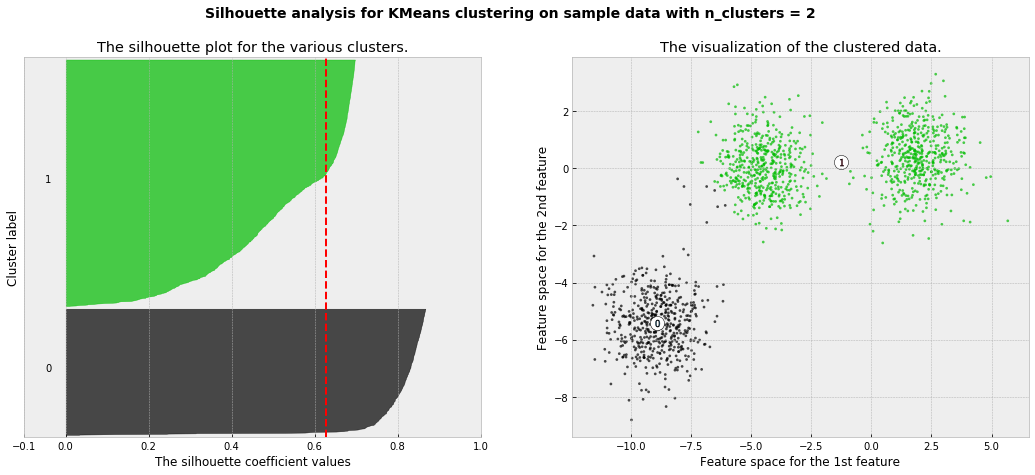

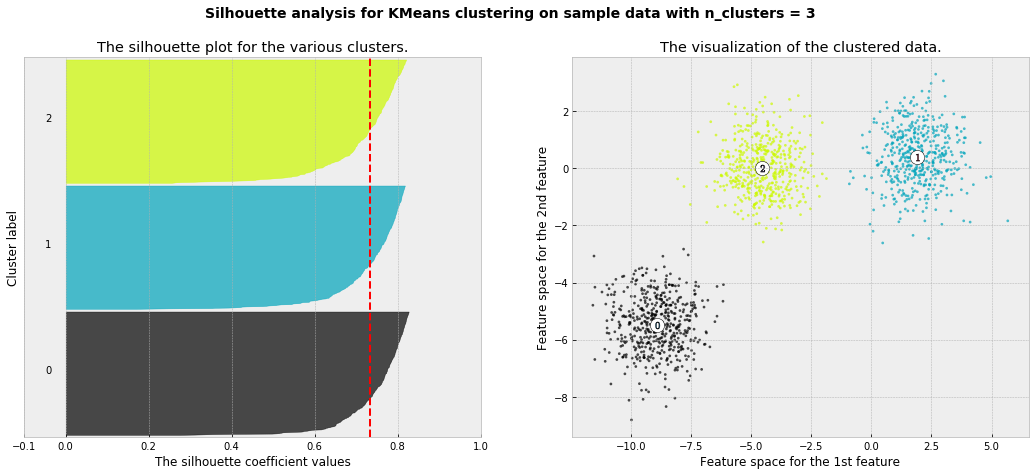

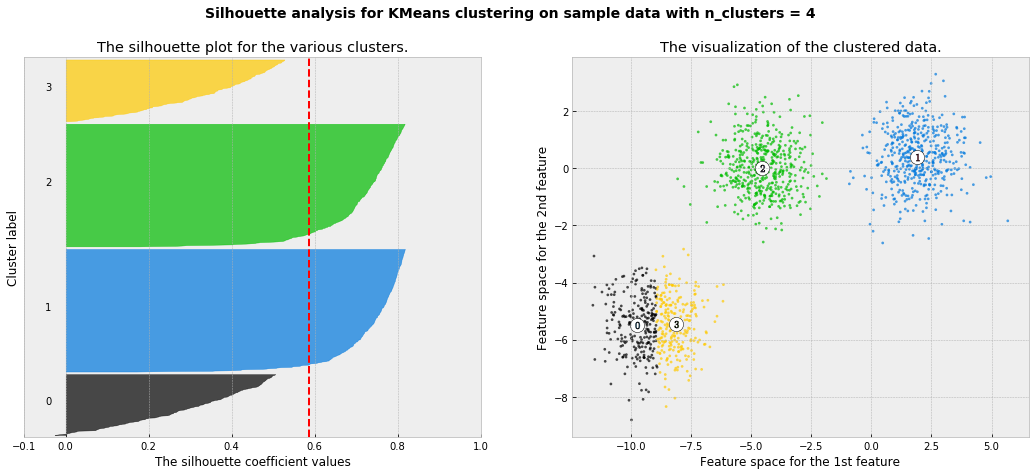

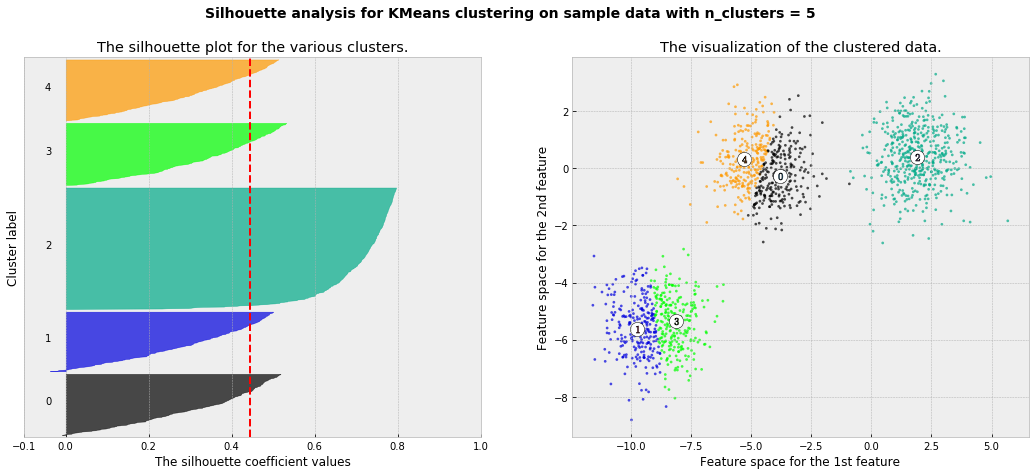

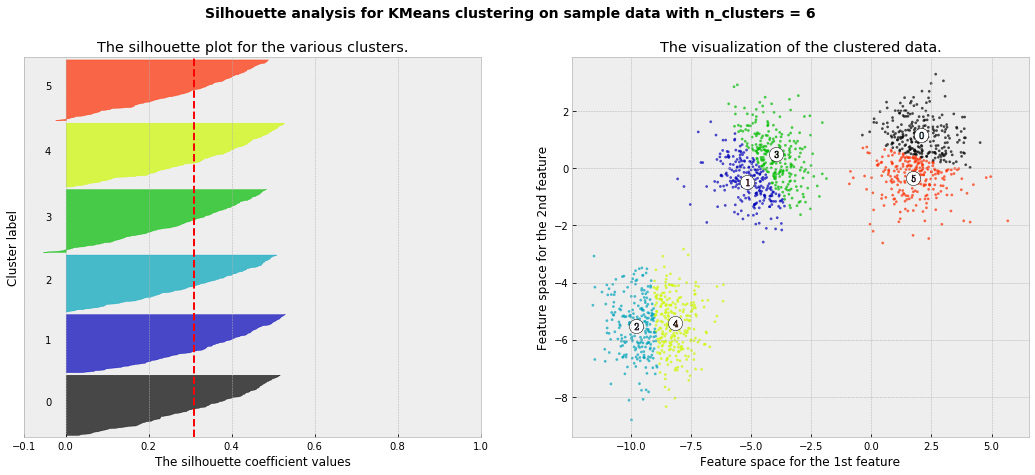

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, "
          f"The average silhouette_score = {silhouette_avg:.3f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

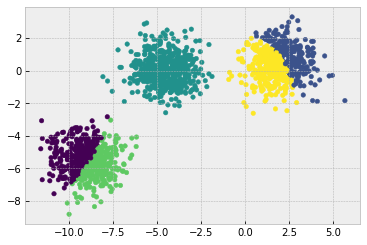

In [7]:
# Representation of a Gaussian mixture model probability distribution.
# This class allows to estimate the parameters of a Gaussian mixture distribution.
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5).fit(X)
y_pred = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=20)

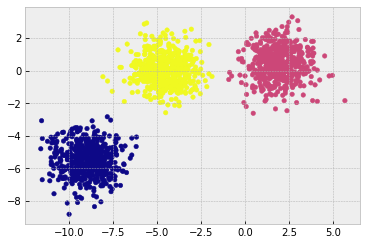

In [8]:
'''
Variational Bayesian estimation of a Gaussian mixture.
This class allows to infer an approximate posterior distribution over the parameters of a Gaussian mixture distribution.
The effective number of components can be inferred from the data.
This class implements two types of prior for the weights distribution: 
a finite mixture model with Dirichlet distribution and an infinite mixture model with the Dirichlet Process.
In practice Dirichlet Process inference algorithm is approximated and uses a truncated distribution with
a fixed maximum number of components (called the Stick-breaking representation).
The number of components actually used almost always depends on the data.
'''
# Dirichlet Process inference algorithm
# Assign n_components=5
dpgmm = mixture.BayesianGaussianMixture(n_components=5, max_iter=200).fit(X)
y_pred = dpgmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma', s=20)

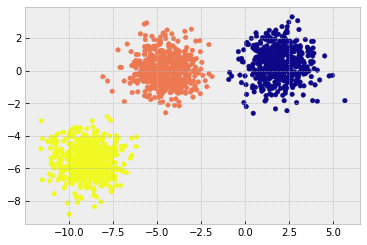

In [9]:
# Assign n_components=4
dpgmm = mixture.BayesianGaussianMixture(n_components=4, max_iter=200).fit(X)
y_pred = dpgmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma', s=20)

In [10]:
# Use GridSearch to find an optimal n_clusters for KMeans
# Result: n_clusters=3

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KMeans(), {'n_clusters': [1, 2, 3, 4, 5]}, scoring='adjusted_rand_score')
grid.fit(X, y)
grid.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)